## Problem : The dataset includes enviromental sensor data with the occupancy status of a certain room. The aim is to train a model that can perdict the occupancy status and control the electronic appliances such as lights for enegy saving.

In [17]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

import datetime


In [18]:
data = pd.read_csv('Housing_Data.csv')
print(data.shape)
data.sample(10)

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6399,Malvern East,4 Batesford Rd,3,h,NaN,S,Fletchers,12/11/2016,11.2,3145.0,...,1.0,1.0,590.0,NaN,NaN,Stonnington City Council,-37.87690,145.08640,Southern Metropolitan,8801.0
29829,Reservoir,7 East St,3,h,810000.0,S,hockingstuart,6/01/2018,12.0,3073.0,...,2.0,2.0,186.0,118.0,2014.0,Darebin City Council,-37.72156,145.01103,Northern Metropolitan,21650.0
14896,Coburg,1/185 Moreland Rd,3,t,690000.0,SP,Nelson,3/06/2017,6.7,3058.0,...,1.0,1.0,64.0,109.0,2011.0,Darebin City Council,-37.75535,144.96481,Northern Metropolitan,11204.0
21344,Meadow Heights,25 Darebin Ct,3,h,370000.0,S,YPA,16/09/2017,17.4,3048.0,...,1.0,1.0,784.0,95.0,1978.0,Hume City Council,-37.65877,144.91191,Northern Metropolitan,4704.0
31954,Mount Waverley,26 Headingley Rd,3,h,1330000.0,S,Fletchers,3/03/2018,14.2,3149.0,...,1.0,1.0,728.0,NaN,1951.0,Monash City Council,-37.86393,145.13670,Eastern Metropolitan,13366.0
5191,Hawthorn,4 Osborne Ct,5,h,NaN,S,Marshall,4/03/2017,4.6,3122.0,...,4.0,3.0,571.0,145.0,1940.0,Boroondara City Council,-37.81570,145.01610,Southern Metropolitan,11308.0
26229,Mooroolbark,6 Esther Cr,3,h,870000.0,PI,McGrath,28/10/2017,26.5,3138.0,...,1.0,2.0,853.0,135.0,1980.0,Yarra Ranges Shire Council,-37.78156,145.30784,Eastern Victoria,8280.0
27161,Mernda,13 Eaglehawk Dr,3,h,487500.0,S,Ray,11/11/2017,25.9,3754.0,...,2.0,2.0,NaN,NaN,NaN,Whittlesea City Council,-37.60660,145.09350,Northern Metropolitan,5812.0
18174,Mill Park,17B Buick Cr,3,h,522000.0,S,Ray,12/08/2017,17.9,3082.0,...,NaN,NaN,NaN,NaN,NaN,Whittlesea City Council,NaN,NaN,Northern Metropolitan,10529.0
3000,Carnegie,1/6 Parton Ct,2,u,650000.0,S,hockingstuart,18/03/2017,11.4,3163.0,...,NaN,NaN,NaN,NaN,NaN,Glen Eira City Council,NaN,NaN,Southern Metropolitan,7822.0


In [19]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857.0,NaN,NaN,NaN,3.031012,0.969933,1.0,2.0,3.0,4.0,16.0
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247.0,NaN,NaN,NaN,1050173.344955,641467.130105,85000.0,635000.0,870000.0,1295000.0,11200000.0
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856.0,NaN,NaN,NaN,11.184929,6.788892,0.0,6.4,10.3,14.0,48.1
Postcode,34856.0,NaN,NaN,NaN,3116.062859,109.023903,3000.0,3051.0,3103.0,3156.0,3978.0


#### We can drop following colomns because we need to predict price in a certain area.

In [20]:
data.drop(labels='Address', axis=1, inplace=True)
data.drop(labels='Lattitude', axis=1, inplace=True)
data.drop(labels='Longtitude', axis=1, inplace=True)

#### We can drop following colomns because follwing details cannot be get as a input from user.

In [21]:
data.drop(labels='SellerG', axis=1, inplace=True)
data.drop(labels='Propertycount', axis=1, inplace=True)

#### We can also drop 'Postcode','CouncilArea','RegionName' colomn because 'Suburb' can be used to identify a certain area

In [22]:
Suburb_Data = data[['Postcode','CouncilArea','Regionname']]
data.drop(labels='Postcode', axis=1, inplace=True)
data.drop(labels='CouncilArea', axis=1, inplace=True)
data.drop(labels='Regionname', axis=1, inplace=True)

In [23]:
temp_data = []
in_data = data['Date'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    temp_date = datetime.datetime.strptime(row, date_format)
    delta = today - temp_date
    #data['NofDays',index]= delta.days
    temp_data.append(delta.days)
data['DaysFromSale'] = temp_data

data.drop(labels='Date', axis=1, inplace=True)

In [24]:
temp_data = []
in_data = data['YearBuilt'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    if(np.isnan(row)):
        temp_data.append(np.NaN)
    else:
        temp_data.append(today.year - row)
data['Age'] = temp_data

data.drop(labels='YearBuilt', axis=1, inplace=True)

#### Drop rows with null values and copy into tempory dataframe

In [25]:
Temp_data = data.dropna(how='any', axis=0, inplace=False)

In [26]:
correlation_matrix = Temp_data.corr()
correlation_matrix

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,DaysFromSale,Age
Rooms,1.000000,0.474855,0.276981,0.964482,0.623961,0.401251,0.101062,0.606832,-0.231196,-0.007254
Price,0.474855,1.000000,-0.231367,0.460658,0.463153,0.209128,0.058423,0.507194,-0.019425,0.313820
Distance,0.276981,-0.231367,1.000000,0.283855,0.122395,0.259467,0.138297,0.135701,-0.366126,-0.313752
Bedroom,0.964482,0.460658,0.283855,1.000000,0.626391,0.405405,0.100937,0.595395,-0.256838,-0.016633
Bathroom,0.623961,0.463153,0.122395,0.626391,1.000000,0.311108,0.075733,0.553743,-0.132255,-0.193363
Car,0.401251,0.209128,0.259467,0.405405,0.311108,1.000000,0.123320,0.317431,-0.182979,-0.139491
Landsize,0.101062,0.058423,0.138297,0.100937,0.075733,0.123320,1.000000,0.083192,-0.092439,-0.037239
BuildingArea,0.606832,0.507194,0.135701,0.595395,0.553743,0.317431,0.083192,1.000000,-0.104973,-0.059993
DaysFromSale,-0.231196,-0.019425,-0.366126,-0.256838,-0.132255,-0.182979,-0.092439,-0.104973,1.000000,0.120321
Age,-0.007254,0.313820,-0.313752,-0.016633,-0.193363,-0.139491,-0.037239,-0.059993,0.120321,1.000000


#### We can also drop 'Landsize', 'DaysFromSale' since it very low correlation with price

In [27]:
data.drop(labels='Landsize', axis=1, inplace=True)
data.drop(labels='DaysFromSale', axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.dropna(how='any', axis=0, inplace=True)

In [28]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,10060,323,Reservoir,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,10060.0,NaN,NaN,NaN,3.112028,0.961364,1.0,3.0,3.0,4.0,12.0
Type,10060,3,h,7484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10060.0,NaN,NaN,NaN,1085188.894334,679571.72564,131000.0,635000.0,890000.0,1330000.0,9000000.0
Method,10060,5,S,6367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,10060.0,NaN,NaN,NaN,11.528151,7.05382,0.0,6.5,10.5,14.3,48.1
Bedroom,10060.0,NaN,NaN,NaN,3.093439,0.963813,0.0,2.0,3.0,4.0,12.0
Bathroom,10060.0,NaN,NaN,NaN,1.657952,0.718025,1.0,1.0,2.0,2.0,9.0
Car,10060.0,NaN,NaN,NaN,1.706759,0.969202,0.0,1.0,2.0,2.0,10.0
BuildingArea,10060.0,NaN,NaN,NaN,150.378064,87.711731,0.0,100.0,133.0,181.0,3112.0


<AxesSubplot:ylabel='Distance'>

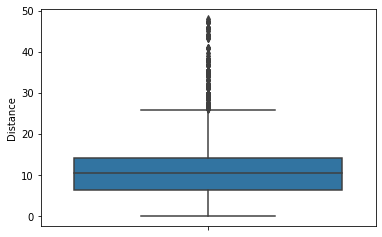

In [29]:
sns.boxplot(y="Distance", data=data)

In [88]:
Type_LE = preprocessing.LabelEncoder()
data['Type_LE'] = Type_LE.fit_transform(data['Type'])
data.drop(labels='Type', axis=1, inplace=True)

In [89]:
Method_LE = preprocessing.LabelEncoder()
data['Method_LE'] = Method_LE.fit_transform(data['Method'])
data.drop(labels='Method', axis=1, inplace=True)

### Since we are trying to control the light, light data can be dropped

In [23]:
data.drop(labels='Light', axis=1, inplace=True)
data.head()

,No.,date,Temperature,Humidity,CO2,HumidityRatio,Occupancy
0,140,2/2/2015 14:19,23.7000,26.272,749.200000,0.004764,1
1,141,2/2/2015 14:19,23.7180,26.290,760.400000,0.004773,1
2,142,2/2/2015 14:21,23.7300,26.230,769.666667,0.004765,1
3,143,2/2/2015 14:22,23.7225,26.125,774.750000,0.004744,1
4,144,2/2/2015 14:23,23.7540,26.200,779.000000,0.004767,1


### Also we don't need 'No.' coloumn.

In [24]:
data.drop(labels='No.', axis=1, inplace=True)
data.head()

,date,Temperature,Humidity,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,779.000000,0.004767,1


In [25]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,20560,16446,2/2/2015 14:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,20560.0,NaN,NaN,NaN,20.906212,1.055315,19.0,20.2,20.7,21.525,24.408333
Humidity,20560.0,NaN,NaN,NaN,27.655925,4.982154,16.745,24.5,27.29,31.29,39.5
CO2,20560.0,NaN,NaN,NaN,690.553276,311.201281,412.75,460.0,565.416667,804.666667,2076.5
HumidityRatio,20560.0,NaN,NaN,NaN,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,NaN,NaN,NaN,0.231031,0.421503,0.0,0.0,0.0,0.0,1.0


### Remove repeated data

In [50]:
data.drop_duplicates(inplace=True)

In [51]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,20500.0,20.908042,1.055437,19.000000,20.200000,20.700000,21.52500,24.408333
Humidity,20500.0,27.651199,4.979951,16.745000,24.500000,27.290000,31.27875,39.500000
CO2,20500.0,690.798294,311.246435,412.750000,460.000000,565.666667,805.00000,2076.500000
HumidityRatio,20500.0,0.004228,0.000768,0.002674,0.003719,0.004291,0.00483,0.006476
Occupancy,20500.0,0.231707,0.421933,0.000000,0.000000,0.000000,0.00000,1.000000


### Identify `X` and `y`

,Temperature,Humidity,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.156385,0.449865,0.205962,0.555651
Humidity,-0.156385,1.000000,0.300843,0.932683,0.046870
CO2,0.449865,0.300843,1.000000,0.478957,0.502032
HumidityRatio,0.205962,0.932683,0.478957,1.000000,0.257985
Occupancy,0.555651,0.046870,0.502032,0.257985,1.000000


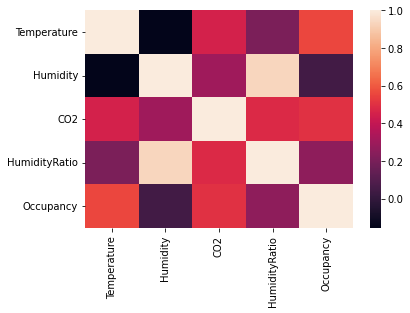

In [63]:
correlation_matrix = data[['Temperature', 'Humidity', 'CO2','HumidityRatio', 'Occupancy']].corr()
sns.heatmap(correlation_matrix)
correlation_matrix

### Since correlation between Humidity and Occupancy is very low, the X variables will be 'Temperature', 'CO2' and 'HumidityRatio' .

<AxesSubplot:ylabel='Temperature'>

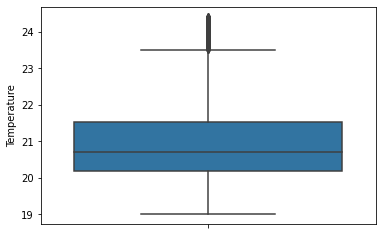

In [77]:
sns.boxplot(y="Temperature", data=data)

<AxesSubplot:ylabel='CO2'>

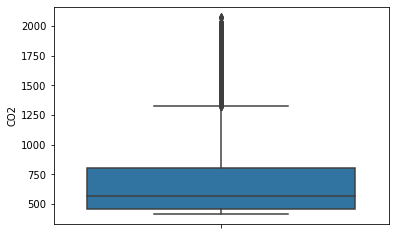

In [90]:
sns.boxplot(y="CO2", data=data)

<AxesSubplot:ylabel='HumidityRatio'>

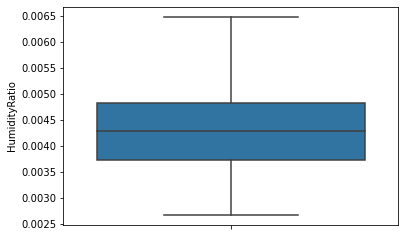

In [91]:
sns.boxplot(y="HumidityRatio", data=data)

### 'Temperature' and 'CO2' has outliers those are need to be removed

In [92]:
cols = ['Temperature','CO2'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
down = (Q1 - (1.5 * IQR))
up = (Q3 + (1.5 * IQR))

print(down)
print(up)

df = data[~((data[cols] < down) |(data[cols] > up)).any(axis=1)]

Temperature    18.2125
CO2           -57.5000
dtype: float64
Temperature      23.5125
CO2            1322.5000
dtype: float64


In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,18544.0,20.778745,0.948301,19.000000,20.100000,20.600000,21.340000,23.500000
Humidity,18544.0,27.386800,4.915245,16.745000,24.340000,27.200000,30.926667,39.500000
CO2,18544.0,624.256442,212.904662,412.750000,454.383333,540.000000,729.425000,1322.500000
HumidityRatio,18544.0,0.004151,0.000729,0.002674,0.003677,0.004244,0.004745,0.005694
Occupancy,18544.0,0.205565,0.404125,0.000000,0.000000,0.000000,0.000000,1.000000


In [95]:
X_variables = ['Temperature', 'CO2','HumidityRatio']
y_varibale = 'Occupancy'
X = df[X_variables].values
Y = df[y_varibale].values

### Train Test Split

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 12980
Test sample size  = 5564


### Fit Model and Prediction

In [97]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [98]:
Y_pred_proba = model.predict_proba(X_test)
Y_pred = model.predict(X_test)

In [99]:
test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':Y_pred, 'Y_pred_prob_0':Y_pred_proba[:, 0] , 'Y_pred_prob_1':Y_pred_proba[:, 1]})
test_result.sample(10)

,Y_act,Y_pred,Y_pred_prob_0,Y_pred_prob_1
1207,1,0,0.809230,0.190770
3660,0,0,0.940769,0.059231
5319,0,0,0.956020,0.043980
3568,0,0,0.895904,0.104096
2717,0,0,0.994816,0.005184
3839,0,0,0.979768,0.020232
3944,0,0,0.929043,0.070957
1223,0,0,0.907030,0.092970
3827,1,0,0.695549,0.304451
3000,0,0,0.962113,0.037887


### Confusion Matrix

In [100]:
cfm = pd.crosstab(test_result['Y_act'], test_result['Y_pred'], margins=True)
cfm

Y_pred,0,1,All
Y_act,,,
0,4202,242,4444
1,373,747,1120
All,4575,989,5564


In [101]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1]) / cfm.loc['All','All'] 
acuracy

0.8894680086268871

### Receiver operating characteristic (ROC)

ROC AUC Score = 0.9310099090266171


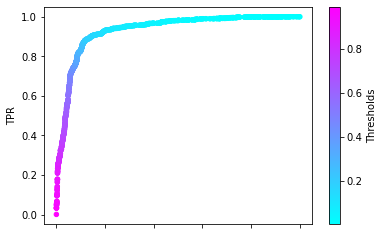

In [102]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['Y_act'], test_result['Y_pred_prob_1'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['Y_act'], test_result['Y_pred_prob_1'])

print(F"ROC AUC Score = {roc_auc}")

### Precision Recall Curve (PRC)

<AxesSubplot:xlabel='Recall', ylabel='Precision'>

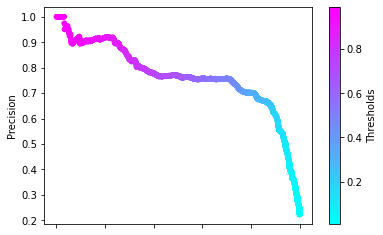

In [103]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['Y_act'], test_result['Y_pred_prob_1'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)